In [2]:
#imported necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

import dataset

In [22]:
# Load the preprocessed dataset 
df = pd.read_csv(r"..\API\data\raw\train_data.csv")

print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

head of the dataset

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


distribution of classes

In [5]:
print("\nDistribution of classes:")
class_counts = df['class'].value_counts()
print(class_counts)
print(f"Class Balance: {class_counts.values[0]/class_counts.values[1]:.2f}:1")


Distribution of classes:
class
normal     13449
anomaly    11743
Name: count, dtype: int64
Class Balance: 1.15:1


features which are categorical and numerical

In [18]:
# Categorical features (object, category, or boolean)
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Numerical features (int and float)
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['protocol_type', 'service', 'flag', 'class']
Numerical features: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


bar showing number of number of categorical and number of numerical features

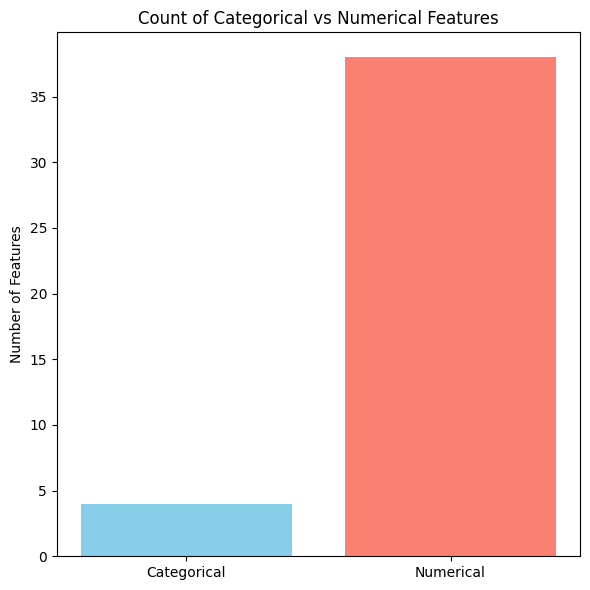

In [19]:
counts = {'Categorical': len(categorical_features), 'Numerical': len(numerical_features)}

# Plotting
plt.figure(figsize=(6, 6))
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon'])
plt.title("Count of Categorical vs Numerical Features")
plt.ylabel("Number of Features")
plt.tight_layout()
plt.show()

bar graph showing all the numerical features

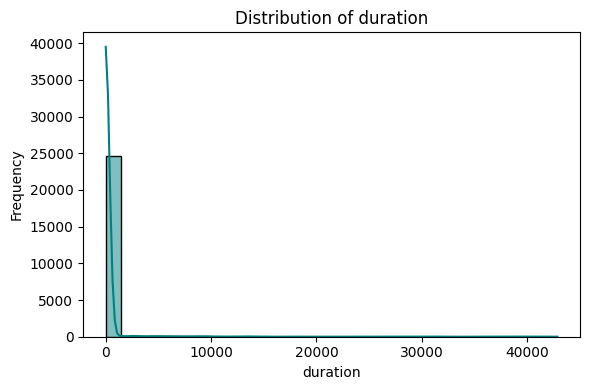

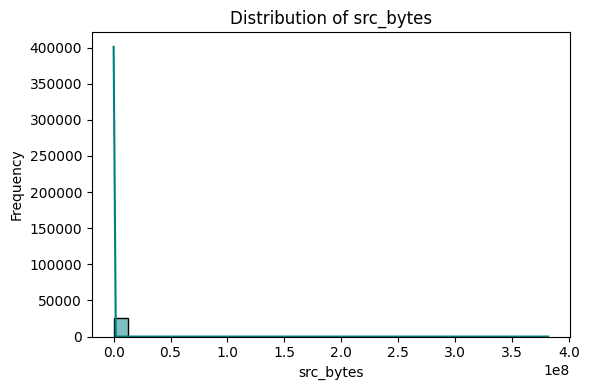

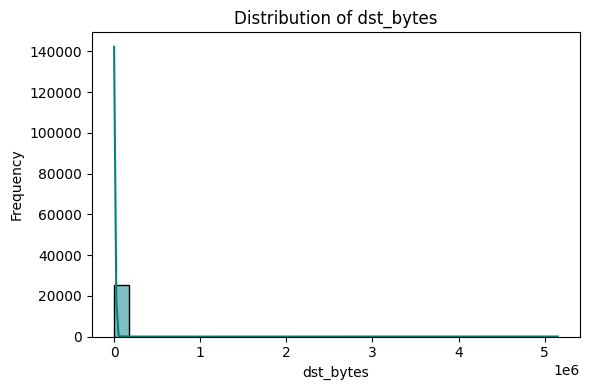

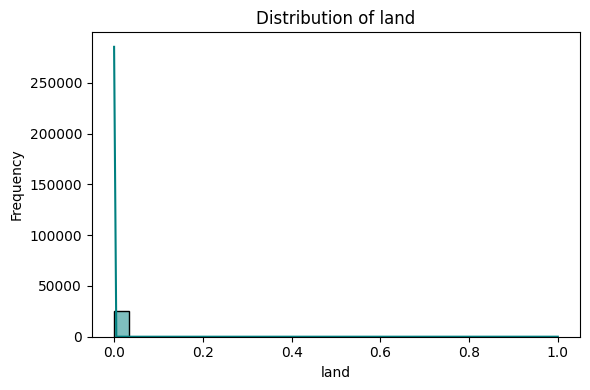

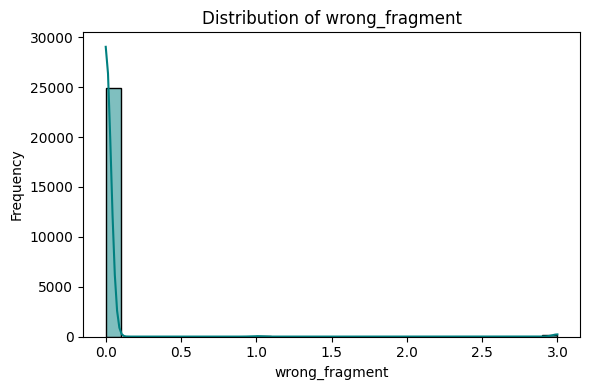

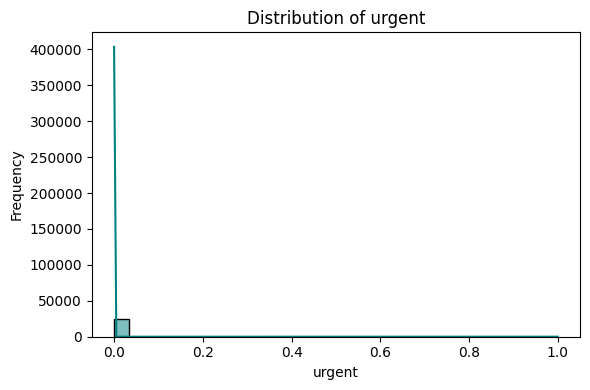

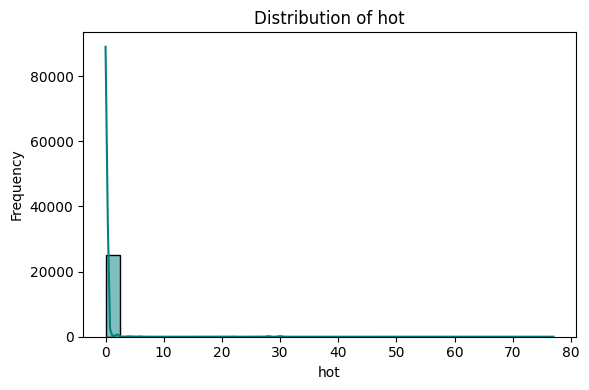

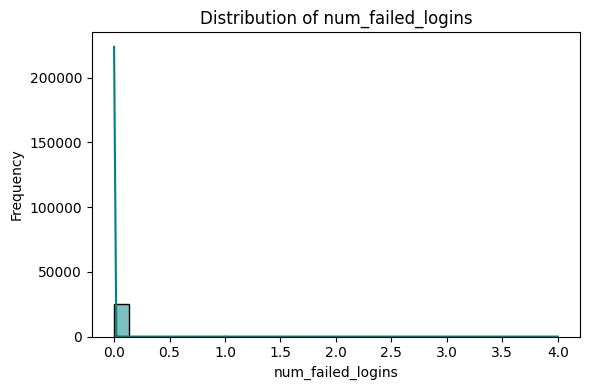

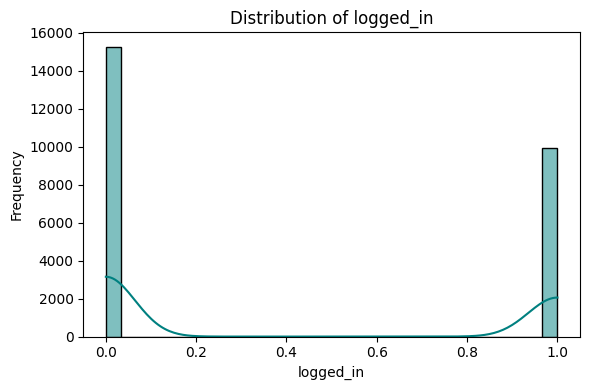

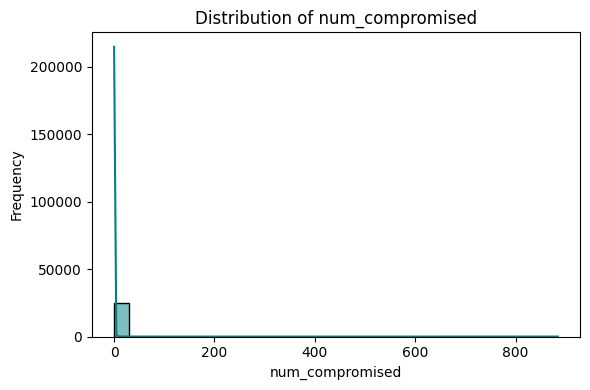

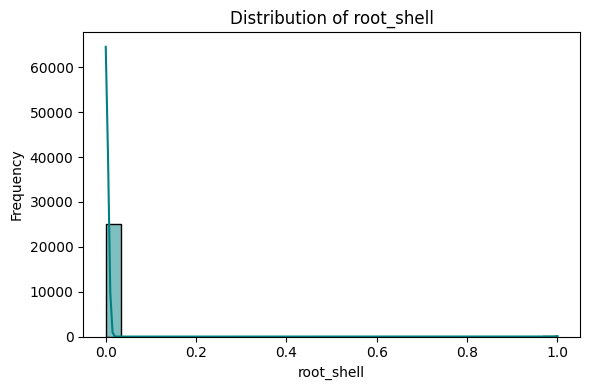

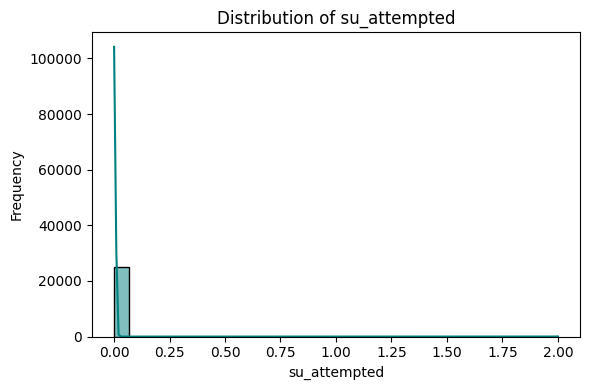

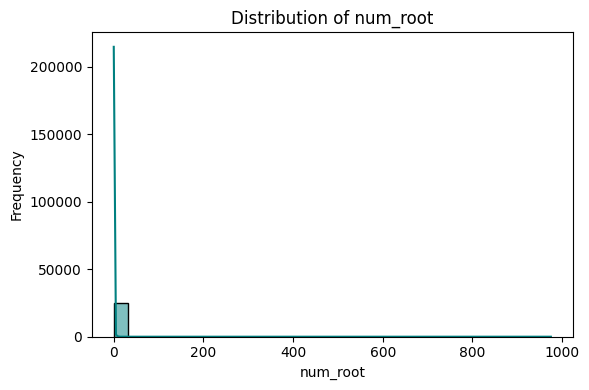

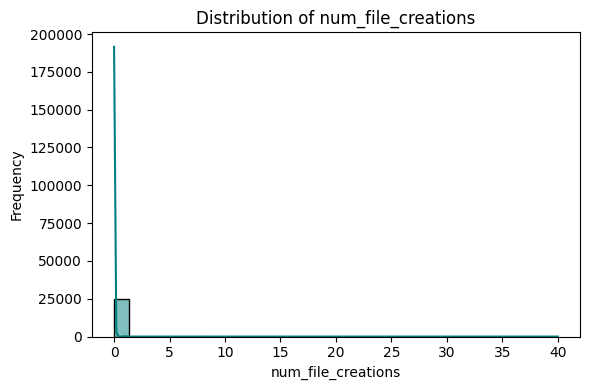

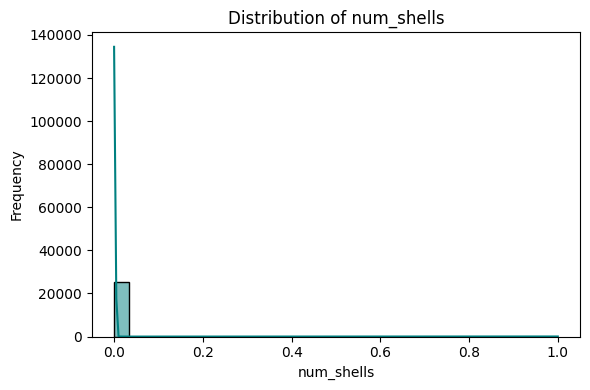

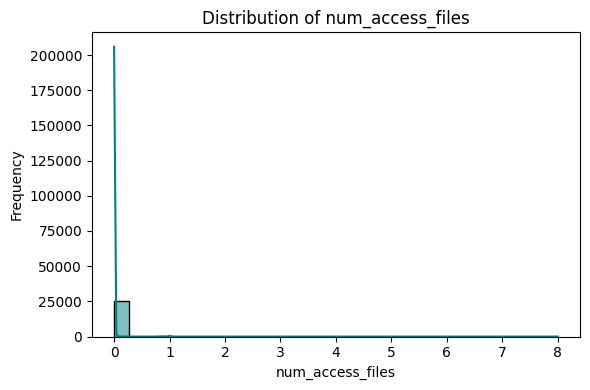

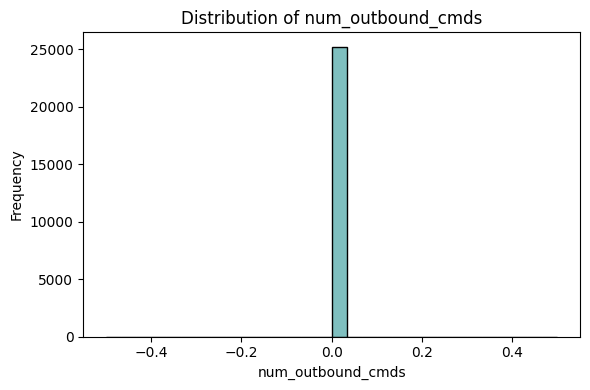

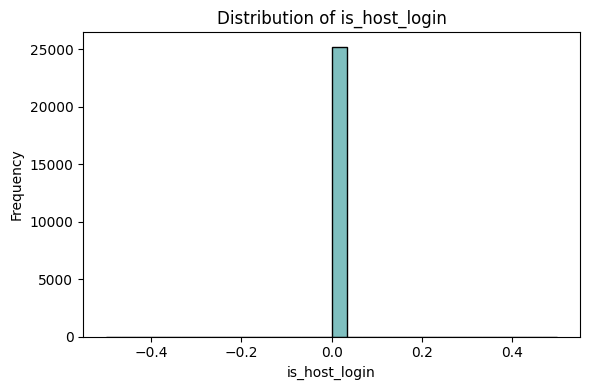

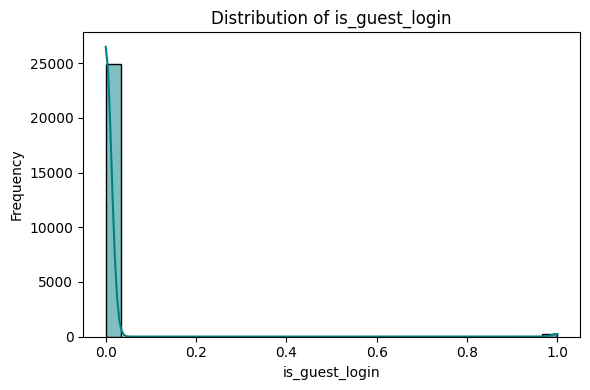

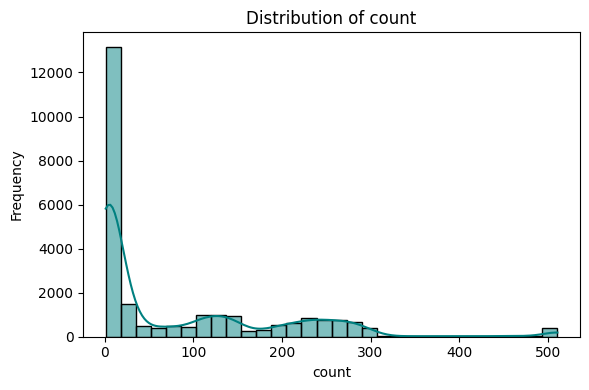

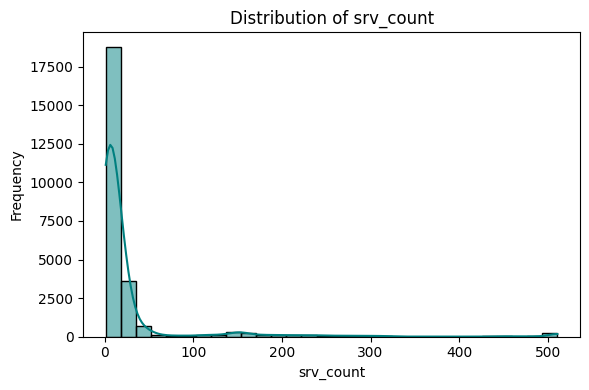

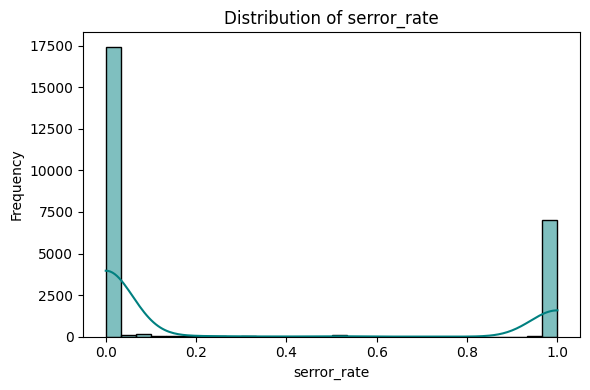

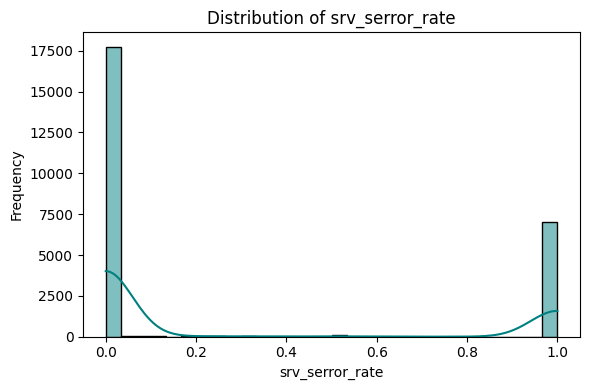

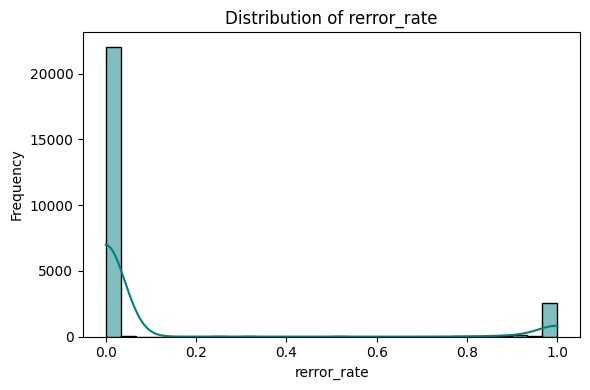

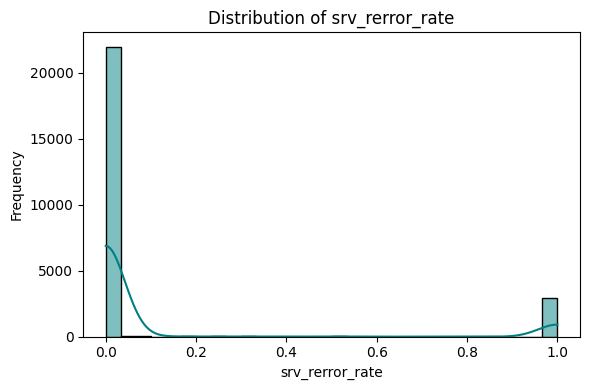

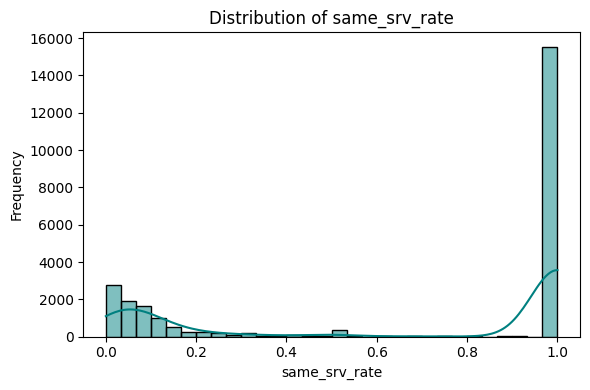

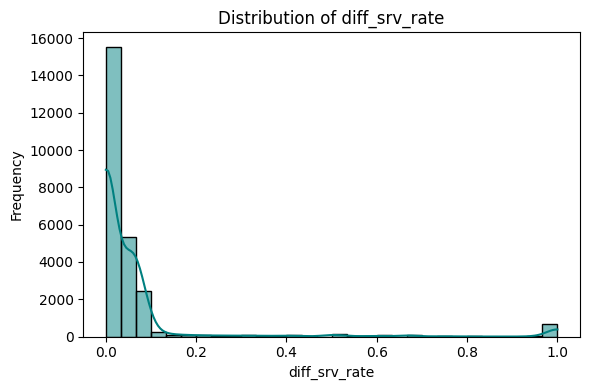

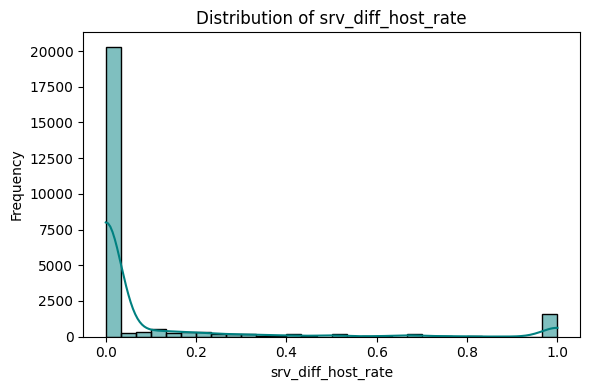

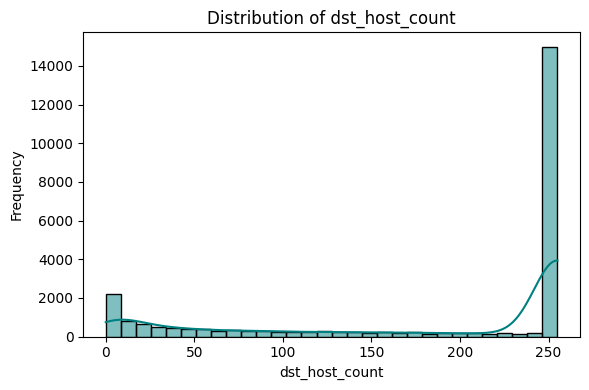

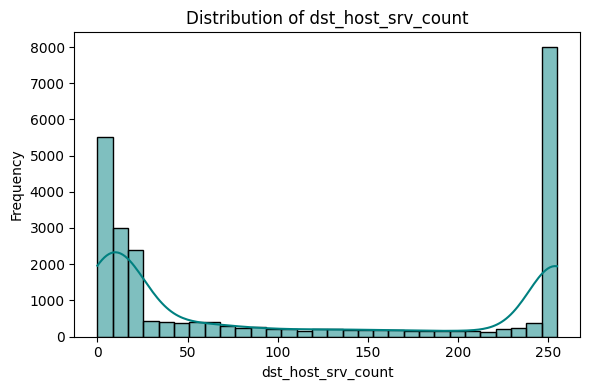

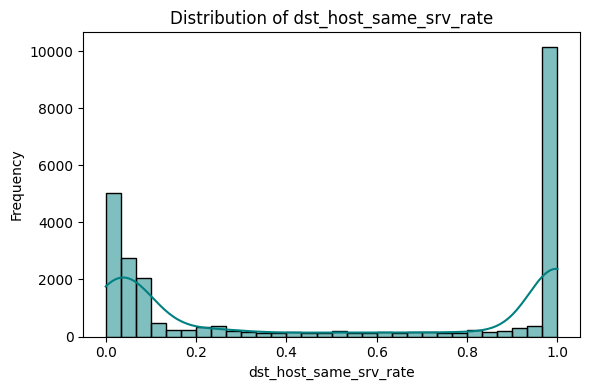

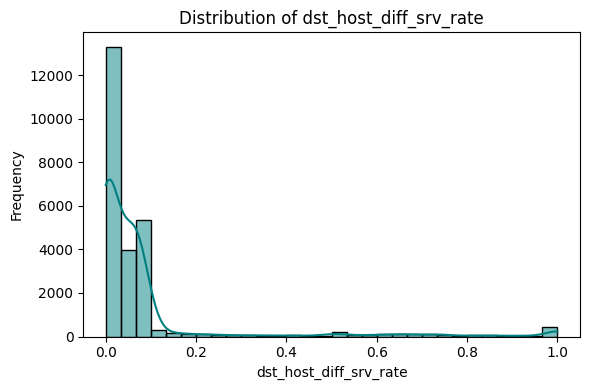

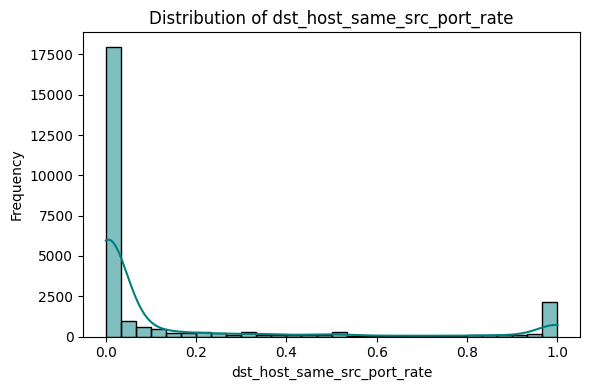

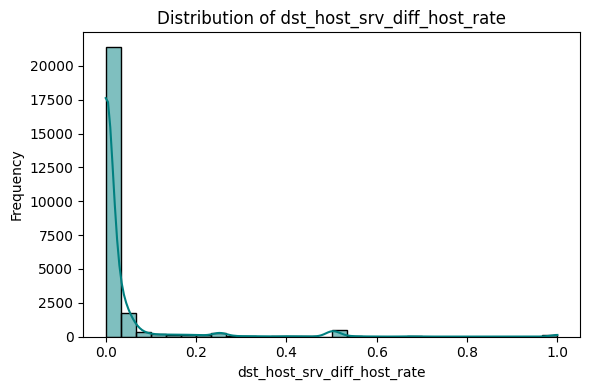

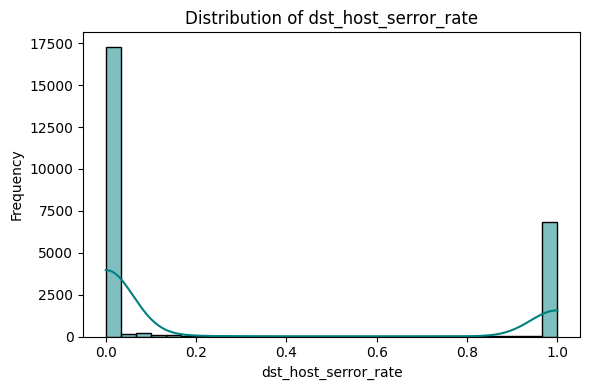

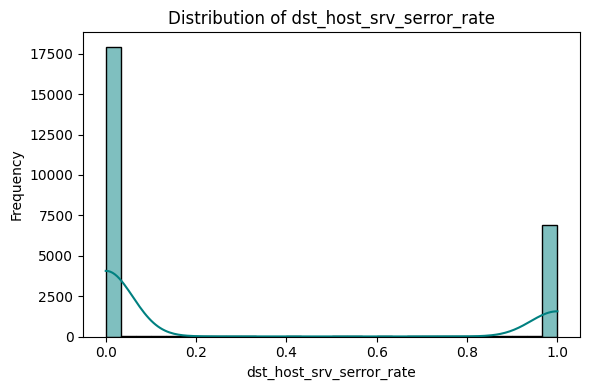

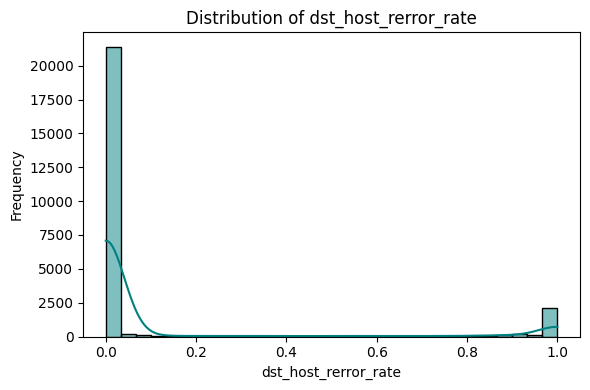

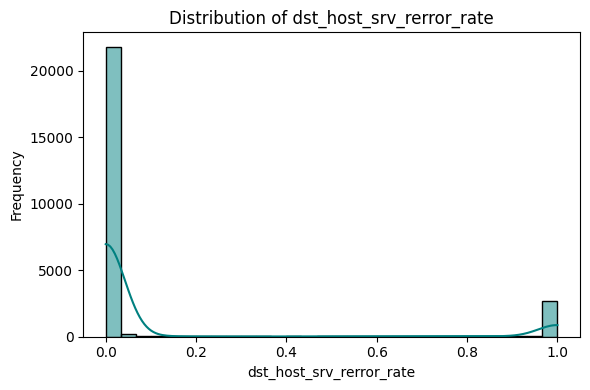

In [21]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

bar graph and pie chart representing distribution of classes

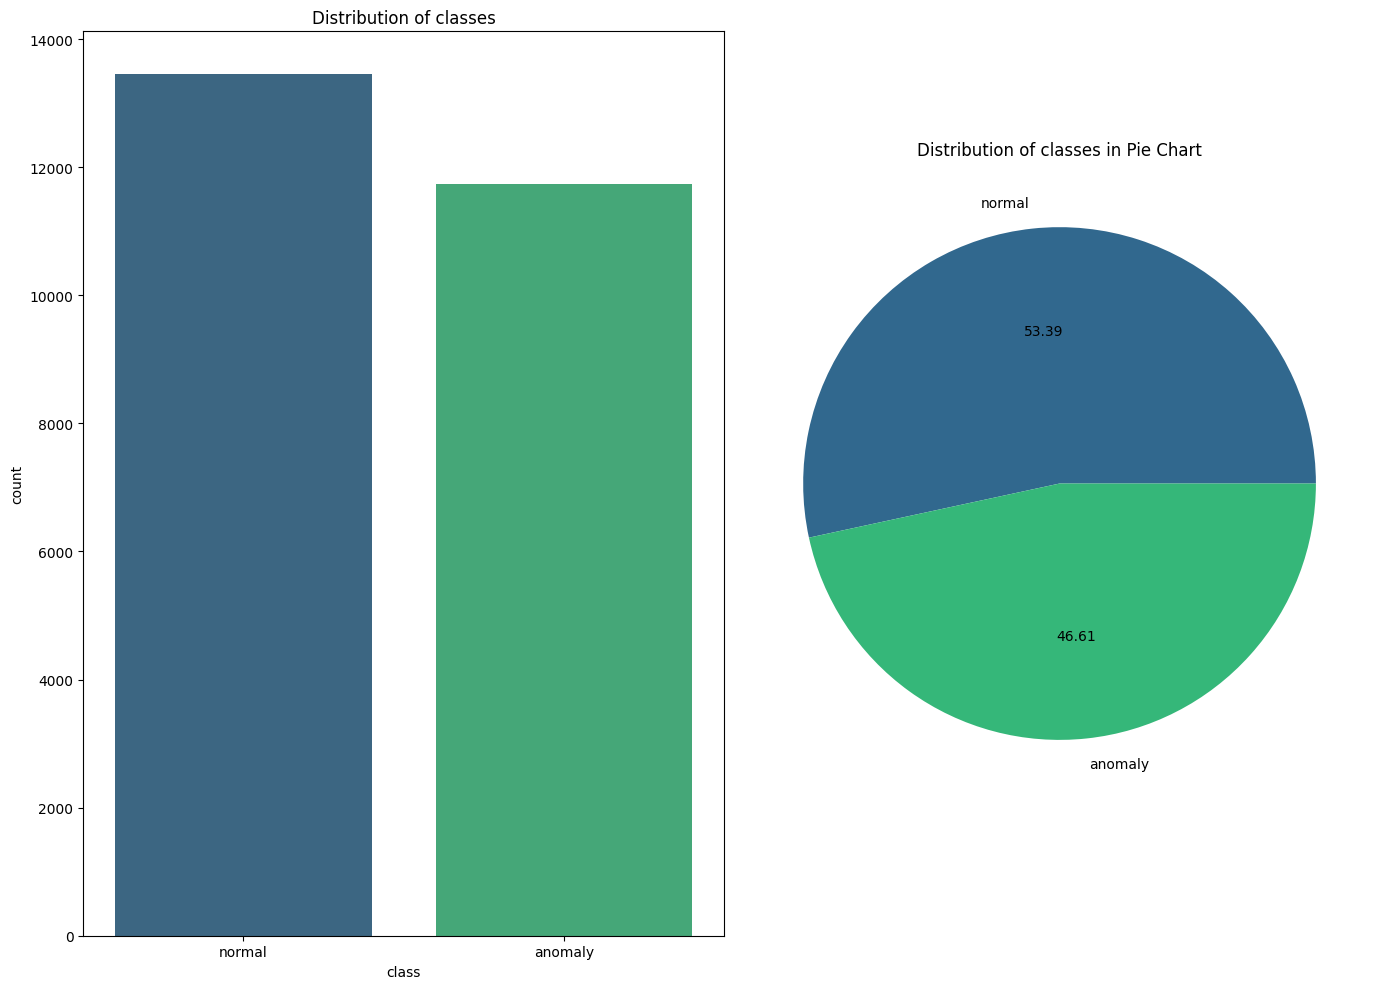

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 10))  # 1 row, 2 columns

palette = "viridis"

# Pie chart of class distribution
label = df['class'].value_counts().index
color = sns.color_palette(palette, n_colors=2)
axes[1].pie(df['class'].value_counts(), labels=label, autopct="%0.2f", colors=color)
axes[1].set_title("Distribution of classes in Pie Chart")

# Bar chart of class distribution
sns.countplot(ax=axes[0], x=df['class'], hue=df['class'], palette=palette)
axes[0].set_title("Distribution of classes")

plt.tight_layout()
plt.show()


bar graph showing frequency of protocol_type

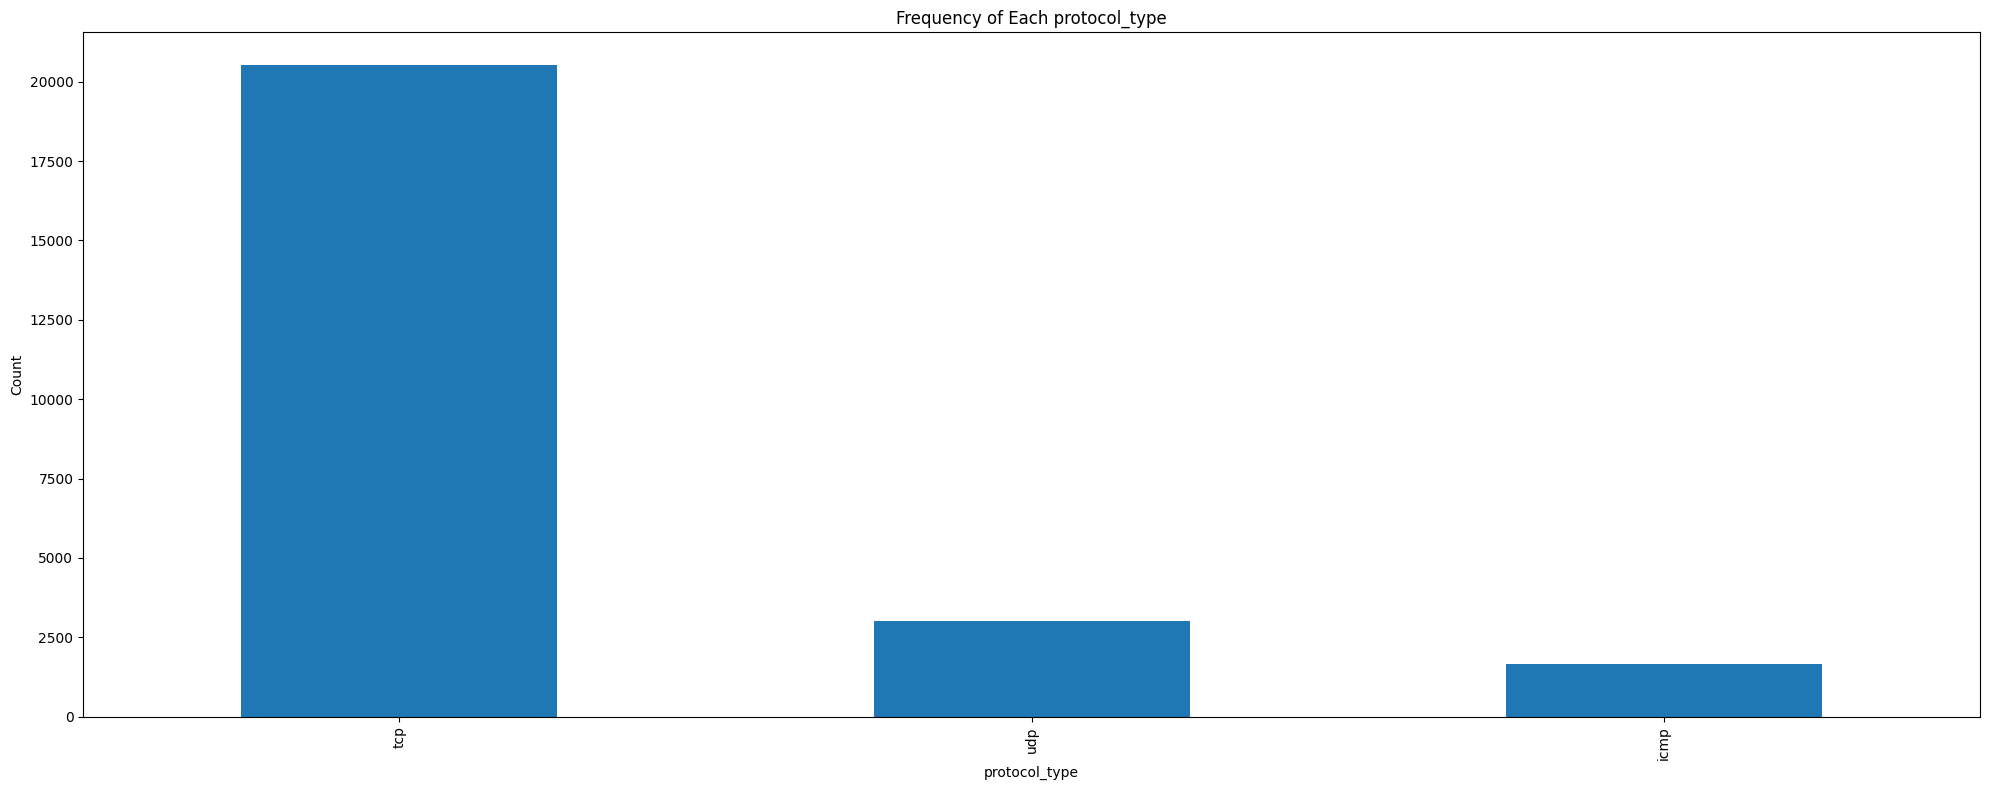

In [15]:
service_counts = df['protocol_type'].value_counts()

# Plot the bar graph
plt.figure(figsize=(20, 8))  
service_counts.plot(kind='bar')
plt.title('Frequency of Each protocol_type')
plt.xlabel('protocol_type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.tight_layout()
plt.show()

Bar graph showing frequency of each service

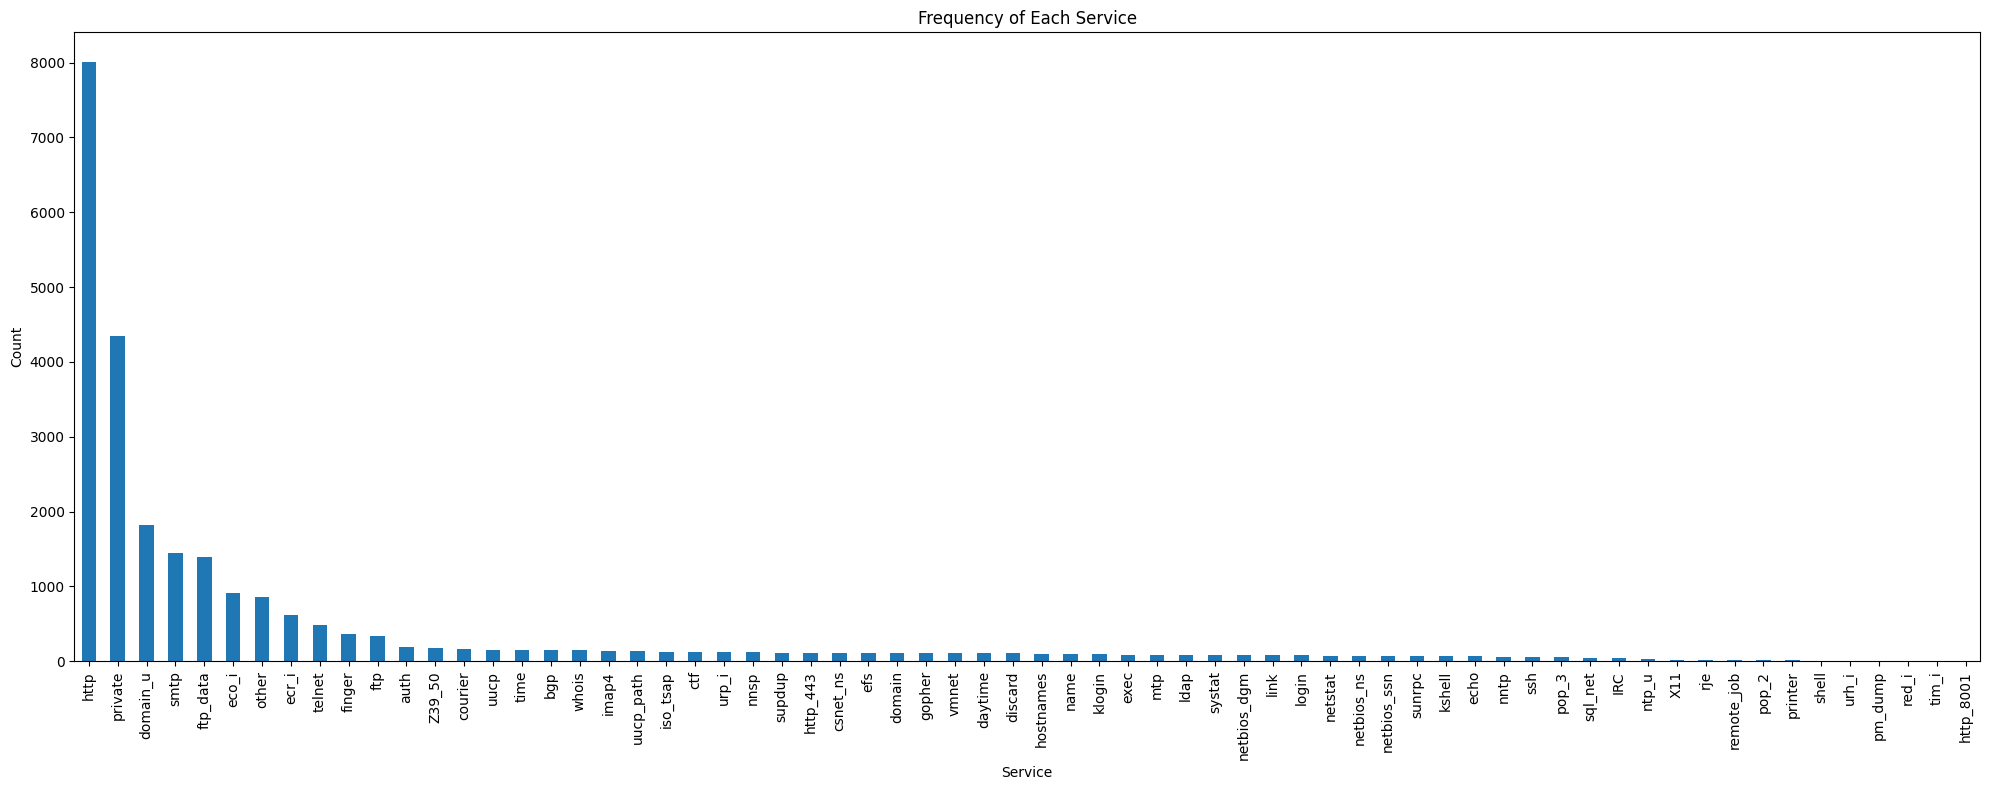

In [10]:
service_counts = df['service'].value_counts()

# Plot the bar graph
plt.figure(figsize=(20, 8))  
service_counts.plot(kind='bar')
plt.title('Frequency of Each Service')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.tight_layout()
plt.show()

frequency of each flag

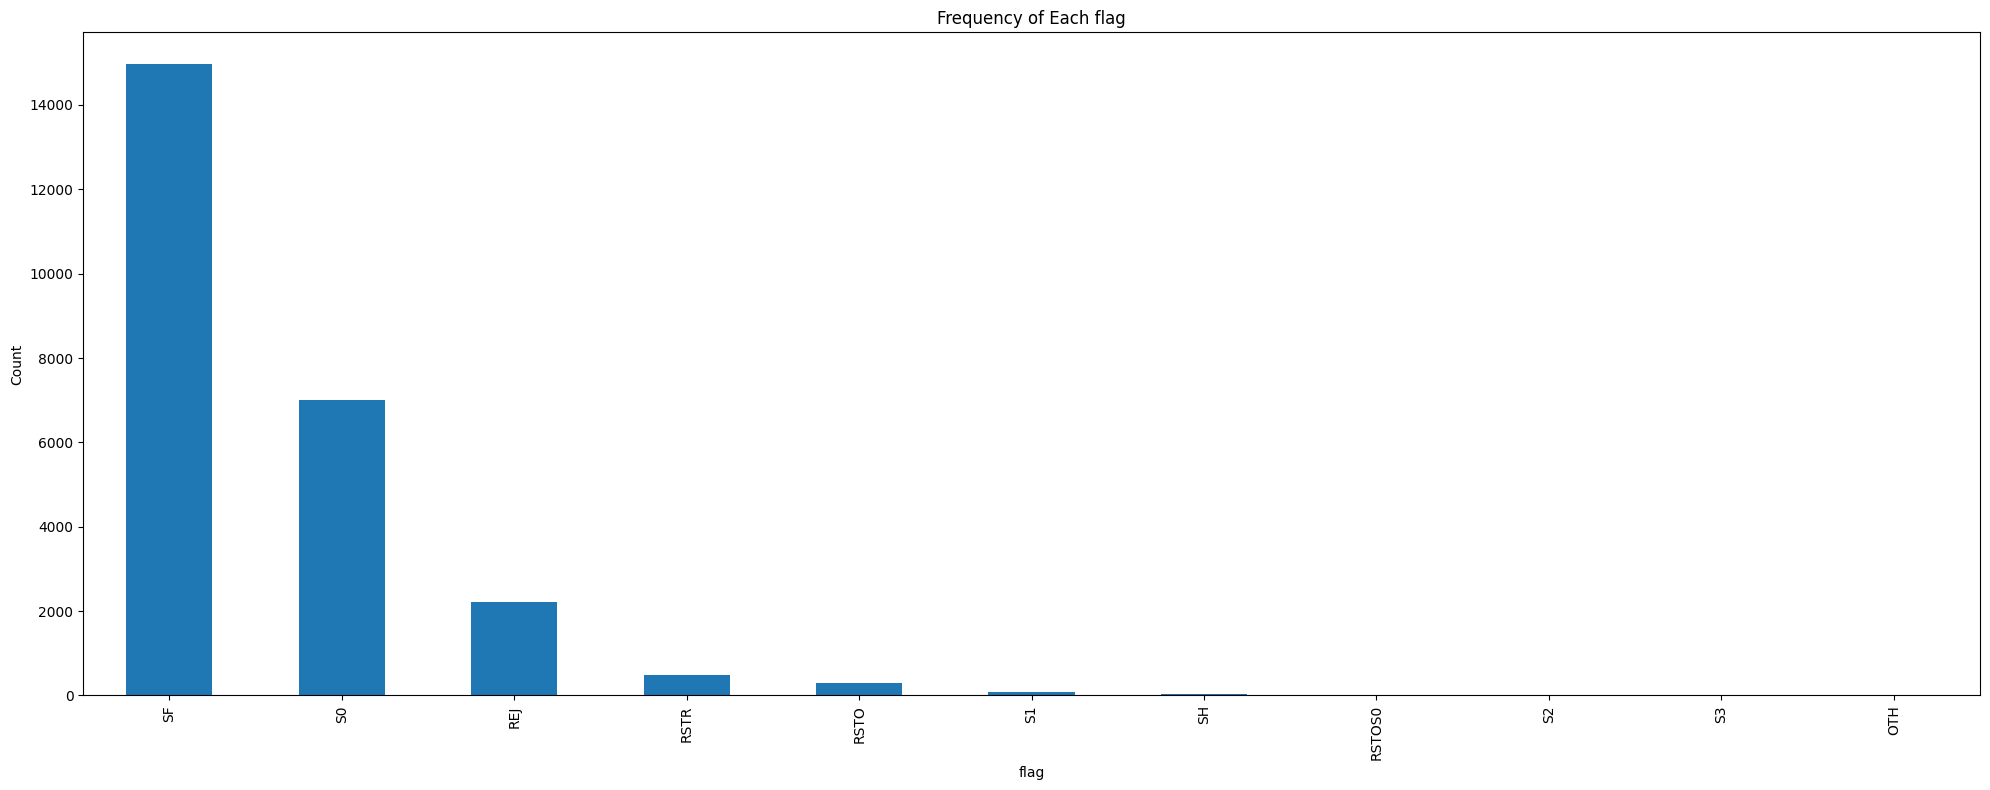

In [20]:
service_counts = df['flag'].value_counts()

# Plot the bar graph
plt.figure(figsize=(20, 8))  
service_counts.plot(kind='bar')
plt.title('Frequency of Each flag')
plt.xlabel('flag')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.tight_layout()
plt.show()

Head of the dataset after preprocessing

In [23]:
df = pd.read_csv(r"..\API\data\processed\train_data.csv")

df.head()

,service,flag,src_bytes,dst_bytes,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,class
0,22,9,239,16225,1.00,0.00,255,1.00,0.00,0.0,1
1,39,5,0,0,0.10,0.05,22,0.09,0.06,1.0,0
2,17,5,0,0,0.25,0.17,64,0.25,0.02,1.0,0
3,22,9,325,3983,1.00,0.00,255,1.00,0.00,0.0,1
4,22,9,285,263,1.00,0.00,255,1.00,0.00,0.0,1


co-relation matrix of preprocessed dataset

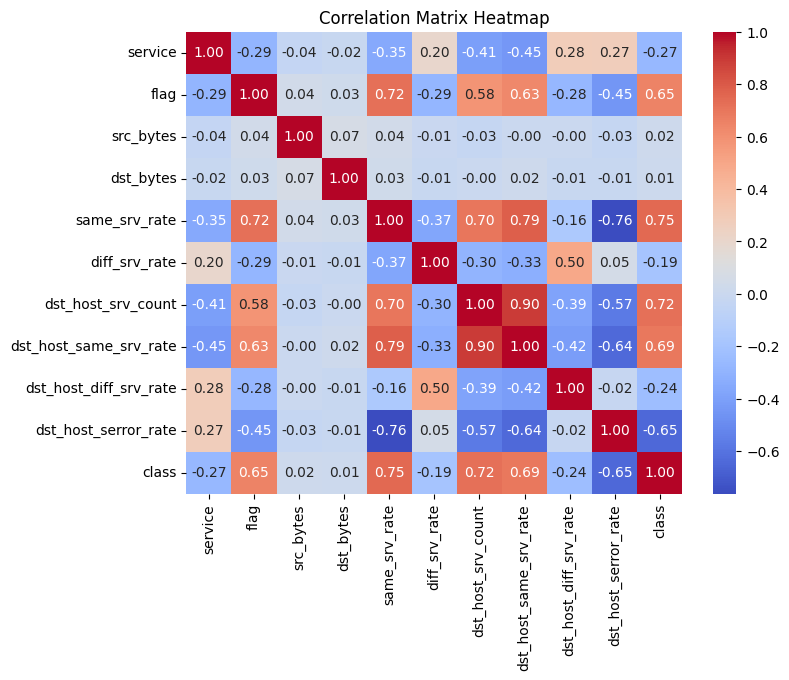

In [24]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

distribution of classes after preprocessed dataset

In [8]:
print("\nDistribution of classes:")
class_counts = df['class'].value_counts()
print(class_counts)
print(f"Class Balance: {class_counts.values[0]/class_counts.values[1]:.2f}:1")


Distribution of classes:
class
1    10778
0     9375
Name: count, dtype: int64
Class Balance: 1.15:1
